<a href="https://colab.research.google.com/github/harperd17/energy_volatility_prediction/blob/main/notebooks/Modeling/best_model_performance_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal

The goal is to find the best model to predict target_COV

In [ ]:
!git clone https://github.com/harperd17/energy_volatility_prediction.git

Cloning into 'energy_volatility_prediction'...
remote: Enumerating objects: 555, done.
remote: Counting objects: 100% (555/555), done.
remote: Compressing objects: 100% (537/537), done.
remote: Total 555 (delta 335), reused 16 (delta 9), pack-reused 0
Receiving objects: 100% (555/555), 6.79 MiB | 12.73 MiB/s, done.
Resolving deltas: 100% (335/335), done.


In [ ]:
!pip install neptune-client --quiet

import neptune.new as neptune

name = "Adam"
#Not grid "adamgoldsteindatascience/energyprice-volatility-grid"

neptune_project_name = "adamgoldsteindatascience/energyprice-volatility"

#Overall Reproduceability
random_state = 0


     |████████████████████████████████| 276 kB 8.2 MB/s 
     |████████████████████████████████| 829 kB 47.2 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 180 kB 53.1 MB/s 
     |████████████████████████████████| 131 kB 54.8 MB/s 
     |████████████████████████████████| 8.4 MB 37.6 MB/s 
     |████████████████████████████████| 79 kB 9.1 MB/s 
     |████████████████████████████████| 138 kB 58.5 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 127 kB 74.2 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 130 kB 56.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import xgboost as xgb
import pandas as pd
from energy_volatility_prediction.helpers.sklearnlogger import SklearnLogger
from energy_volatility_prediction.helpers.fengine import Fengine
import sys
sys.path.append("energy_volatility_prediction/helpers/")
from energy_volatility_prediction.helpers.model_functions import *
from google.colab import drive

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install plotly==4.5
import plotly.express as px
import json
!pip install us
import us

     |████████████████████████████████| 7.1 MB 7.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 132 kB 8.5 MB/s 
  Created wheel for us: filename=us-2.0.2-py3-none-any.whl size=11942 sha256=af79d7052265a776b5b2d693a3ed71164032b966568beba610bc6908da68f4c9
  Stored in directory: /root/.cache/pip/wheels/ca/6b/11/cda9ea2438f721330a35c9a2c8e34b4aedcd34c89af48a4d00
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp37-cp37m-linux_x86_64.whl size=72192 sha256=91e4c4d71c46ee1680e577989453ba3437112e12247a7619d509fc613c609872
  Stored in directory: /root/.cache/pip/wheels/a1/99/51/7de469e37cd1b3c763c24394e1ebf1baa2d79e094bf346cf80
Successfully built us jellyfish


In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/Shareddrives/Data606_Energy

/content/drive/Shareddrives/Data606_Energy


In [ ]:
df = pd.read_csv("data/merge_ready/merged_data_2001-2020_new_data_113021_830.csv")

In [ ]:
COV_by_state = df.groupby(by='State').mean().reset_index()[['State','target_COV']].sort_values(by='target_COV')
sorted_states = pd.Series(COV_by_state['State']).reset_index(drop=True)
state_to_code = {}
for i, s in enumerate(sorted_states):
  state_to_code[s] = i

In [ ]:
df['State'] = [state_to_code[s] for s in df['State']]

In [ ]:
df

,Year,State,Months Above Average Price Movement BZ=F,Months Above Average Price Volume BZ=F,Months Above Average Price Movement NG=F,Months Above Average Price Volume NG=F,Months Above Average Price Movement CL=F,Months Above Average Price Volume CL=F,Months Above Average Price Movement HO=F,Months Above Average Price Volume HO=F,Hot Summer Months,Cold Winter Months,Dry Summer Months,COV,target_COV,R_AB_MWh,R_AB_count,R_BFG_MWh,R_BFG_count,R_BIT_MWh,R_BIT_count,R_BLQ_MWh,R_BLQ_count,R_DFO_MWh,R_DFO_count,R_GEO_MWh,R_GEO_count,R_JF_MWh,R_JF_count,R_KER_MWh,R_KER_count,R_LFG_MWh,R_LFG_count,R_LIG_MWh,R_LIG_count,R_MSB_MWh,R_MSB_count,R_MSN_MWh,R_MSN_count,R_MSW_MWh,...,Temp Standard Deviations 9,Temp Averages 10,Temp Standard Deviations 10,Temp Averages 11,Temp Standard Deviations 11,Temp Averages 12,Temp Standard Deviations 12,Population Density,PDSI Averages 1,PDSI Standard Deviations 1,PDSI Averages 2,PDSI Standard Deviations 2,PDSI Averages 3,PDSI Standard Deviations 3,PDSI Averages 4,PDSI Standard Deviations 4,PDSI Averages 5,PDSI Standard Deviations 5,PDSI Averages 6,PDSI Standard Deviations 6,PDSI Averages 7,PDSI Standard Deviations 7,PDSI Averages 8,PDSI Standard Deviations 8,PDSI Averages 9,PDSI Standard Deviations 9,PDSI Averages 10,PDSI Standard Deviations 10,PDSI Averages 11,PDSI Standard Deviations 11,PDSI Averages 12,PDSI Standard Deviations 12,Mean Volume Weekly NG=F,Mean Volume Weekly CL=F,Mean Volume Weekly HO=F,COM_percapita_mean_kWh_electricacc,RES_percapita_mean_kWh_electricacc,COM_percapita_mean_kWh_statepop,IND_percapita_mean_kWh_statepop,RES_percapita_mean_kWh_statepop
0,2001,11,0,0,7,7,7,7,4,4,0,2,4,0.035090,0.023952,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.051,0.581,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,2.200508,266.098318,2.585909,257.715494,2.952326,255.386289,3.535675,0.291700,42.843985,270.097660,48.650100,248.828078,39.985405,251.815580,11.605982,237.676486,1.340004,229.673345,-22.444825,238.009842,-22.957154,251.567166,8.770732,257.518698,28.190458,265.850022,29.876769,270.785332,31.834476,278.537078,34.692393,280.189130,135165.683333,3.107708e+05,76504.0875,0.075,0.010,0.435,0.205,0.360
1,2001,31,0,0,7,7,7,7,4,4,0,3,4,0.030268,0.041504,0.000,0.000,0.0,0.0,0.351,0.110,0.017,0.087,0.003,0.159,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.011,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,0.934592,291.929954,1.323791,286.902662,1.759553,282.727839,2.263778,34.240621,24.324357,285.739484,32.974296,290.462362,9.331701,291.964142,-3.276622,283.428945,-4.894737,275.063698,15.101591,277.133827,7.815177,272.892762,0.727050,252.481615,-22.572827,250.142931,-5.203182,243.540405,21.526316,262.286419,14.058752,281.472119,135165.683333,3.107708e+05,76504.0875,0.017,0.005,0.240,0.406,0.354
2,2001,40,0,0,7,7,7,7,4,4,0,4,4,0.067610,0.065392,0.000,0.000,0.0,0.0,0.002,0.015,0.023,0.073,0.001,0.098,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,1.155843,290.607912,1.033096,284.664628,1.734683,279.664690,2.538313,18.169515,77.874402,235.491374,90.525120,247.950883,70.254785,253.247186,71.507177,258.118158,50.594498,260.147020,63.005981,250.518892,64.159091,244.529928,46.553828,240.046466,5.800239,236.886878,26.098086,238.381191,42.559809,232.423696,60.645933,241.112931,135165.683333,3.107708e+05,76504.0875,0.082,0.018,0.223,0.408,0.368
3,2001,44,0,0,7,7,7,7,4,4,1,4,4,0.097578,0.091424,0.000,0.000,0.0,0.0,0.010,0.021,0.000,0.000,0.002,0.292,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.021,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,1.259083,289.950198,1.631078,283.061630,1.729615,278.192247,1.599965,18.405973,23.829227,284.773215,33.487682,297.943713,33.243561,308.776701,34.080067,287.283480,35.666293,271.123708,29.307951,242.353493,31.940090,227.925354,59.203247,249.794869,71.755319,238.216394,52.504479,233.562062,45.595185,234.512119,33.941209,263.408229,135165.683333,3.107708e+05,76504.0875,0.048,0.007,0.370,0.191,0.439
4,2001,45,0,0,7,7,7,7,4

In [ ]:
best_params = {'n_estimators':70,'learning_rate':0.1,'max_depth':4}

In [ ]:
best_pipeline =   [
                  ['col_not_have_and_has','Temp Average','7'],
                  ['col_not_have_and_has','Temp Standard Deviation','13'],
                  ['col_not_have_and_has','Standardized Temp','13'],
                  ['col_not_have_and_has','PDSI Average','8'],
                  ['col_not_have_and_has','PDSI Standard Deviation','13'],
                  ['col_not_have_and_has','Standardized Drought','13'],
                  ("outlier_thresh",3),
                  ("col_not_startswith","R"),
                  ("col_not_endswith","_y"),
                  ("add_entities",None),
                  ("add_carbon_policy",None),
                  ("col_not_endswith","Year"),
                  ("col_not_endswith","electricacc"),
                  ("col_not_endswith","count"),
                  ("col_not_endswith","BZ=F"),
                   ("min_max_scale",'Agg_total_plant_MWh'),
                  ("min_max_scale",'x'),
                  ("min_max_scale",'y'),
                  ("min_max_scale",'Population Density'),
                  ("min_max_scale",'Mean Volume Weekly NG=F'),
                  ("min_max_scale",'Mean Volume Weekly CL=F'),
                  ("min_max_scale",'Mean Volume Weekly HO=F'),
                  ("min_max_scale",'Months Above Average Price Movement NG=F'),
                  ("min_max_scale",'Months Above Average Price Movement CL=F'),
                  ("min_max_scale",'Months Above Average Price Movement HO=F'),
                  ("min_max_scale",'Months Above Average Price Volume NG=F'),
                  ("min_max_scale",'Months Above Average Price Volume CL=F'),
                  ("min_max_scale",'Months Above Average Price Volume HO=F'),
                  ]

# best_pipeline = [#['min_max_scale',["Agg_total_plant_MWh", "Agg_total_plant_count"]],
#                     ['scale_month_columns',None],
#                     #['categorize','State'],
#                     ['drop_columns',['Year','year.1']],
#                     ['treat_bad_values',None],
#                     ("outlier_thresh",3),("col_not_startswith","Agg_R"),
#                     ("col_not_endswith","_y")]

Feature Engineering ( col_not_have_and_has Temp Average ) Complete
Feature Engineering ( col_not_have_and_has Temp Standard Deviation ) Complete
Feature Engineering ( col_not_have_and_has Standardized Temp ) Complete
Feature Engineering ( col_not_have_and_has PDSI Average ) Complete
Feature Engineering ( col_not_have_and_has PDSI Standard Deviation ) Complete
Feature Engineering ( col_not_have_and_has Standardized Drought ) Complete
Outlier Threshold Applied: 0.1520830728960426
Feature Engineering ( outlier_thresh 3 ) Complete
Feature Engineering ( col_not_startswith R ) Complete
Feature Engineering ( col_not_endswith _y ) Complete
Feature Engineering ( add_entities None ) Complete
Feature Engineering ( add_carbon_policy None ) Complete
Feature Engineering ( col_not_endswith Year ) Complete
Feature Engineering ( col_not_endswith electricacc ) Complete
Feature Engineering ( col_not_endswith count ) Complete
Feature Engineering ( col_not_endswith BZ=F ) Complete
Feature Engineering ( min

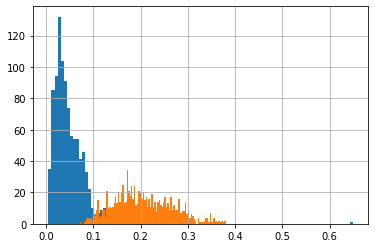

In [ ]:
df_model = feature_engineering_pipeline(df,Fengine,best_pipeline)

In [ ]:
df_model

,State,Months Above Average Price Movement NG=F,Months Above Average Price Volume NG=F,Months Above Average Price Movement CL=F,Months Above Average Price Volume CL=F,Months Above Average Price Movement HO=F,Months Above Average Price Volume HO=F,Hot Summer Months,Cold Winter Months,Dry Summer Months,COV,target_COV,Agg_R_Biomass_MWh,Agg_R_Coal_MWh,Agg_R_Geothermal_MWh,Agg_R_Hydroelectric_MWh,Agg_R_Municipal_Waste_MWh,Agg_R_Natural_Gas_MWh,Agg_R_Nuclear_MWh,Agg_R_Oil_Gas_MWh,Agg_R_Other_MWh,Agg_R_Solar_MWh,Agg_R_Wind_MWh,Agg_R_batteries_or_other_use_of_electricity_as_an_energy_source_MWh,Agg_total_plant_MWh,x,y,Temp Averages 7,Population Density,PDSI Averages 8,Mean Volume Weekly NG=F,Mean Volume Weekly CL=F,Mean Volume Weekly HO=F,COM_percapita_mean_kWh_statepop,IND_percapita_mean_kWh_statepop,WECC,TX_RE,MRO,RF,SERC,NPCC,CA Cap,RGGI,MA Cap
0,11,1.000000,0.625,0.750,0.666667,0.3,0.0,0.000000,0.001157,0.002315,0.035090,0.023952,0.000,0.058,0.000,0.243,0.000,0.543,0.000,0.157,0.000,0.000,0.000,0.000,0.009912,0.049338,1.000000,285.381392,0.000000,8.770732,0.0,0.00000,0.0000,0.435,0.205,0,0,0,0,0,0,0,0,0
1,31,1.000000,0.625,0.750,0.666667,0.3,0.0,0.000000,0.001736,0.002315,0.030268,0.041504,0.028,0.523,0.000,0.082,0.000,0.082,0.283,0.003,0.000,0.000,0.000,0.000,0.221240,0.798413,0.273715,299.945830,0.072528,0.727050,0.0,0.00000,0.0000,0.240,0.406,0,0,0,0,0,0,0,0,0
2,40,1.000000,0.625,0.750,0.666667,0.3,0.0,0.000000,0.002315,0.002315,0.067610,0.065392,0.031,0.529,0.000,0.054,0.000,0.052,0.316,0.019,0.000,0.000,0.000,0.000,0.095594,0.733884,0.325371,300.692982,0.038194,46.553828,0.0,0.00000,0.0000,0.223,0.408,0,0,0,0,0,0,0,0,0
3,44,1.000000,0.625,0.750,0.666667,0.3,0.0,0.000579,0.002315,0.002315,0.097578,0.091424,0.000,0.312,0.000,0.110,0.000,0.173,0.401,0.004,0.000,0.000,0.000,0.000,0.147154,0.514659,0.311356,300.032368,0.038699,59.203247,0.0,0.00000,0.0000,0.370,0.191,0,0,0,0,0,0,0,0,0
4,45,1.000000,0.625,0.750,0.666667,0.3,0.0,0.000000,0.002315,0.002315,0.145412,0.071167,0.027,0.007,0.087,0.187,0.003,0.521,0.135,0.014,0.000,0.004,0.015,0.000,0.276985,0.425250,0.376755,298.021755,0.155164,41.107895,0.0,0.00000,0.0000,0.408,0.267,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,0,0.833333,0.000,0.625,0.500000,0.5,0.4,0.002315,0.001157,0.002315,0.009303,0.012166,0.312,0.000,0.000,0.048,0.000,0.003,0.000,0.001,0.000,0.119,0.520,-0.003,0.000000,0.959568,0.536770,292.549364,0.049460,27.015789,1.0,0.71676,0.8257,0.342,0.252,0,0,0,0,0,0,0,0,0
976,4,0.833333,0.000,0.625,0.500000,0.5,0.4,0.000579,0.001157,0.002315,0.026597,0.014923,0.003,0.054,0.000,0.715,0.001,0.091,0.099,0.003,0.000,0.000,0.034,0.000,0.196711,0.411769,0.607104,292.025720,0.079526,85.433257,1.0,0.71676,0.8257,0.319,0.249,0,0,0,0,0,0,0,0,0
977,10,0.833333,0.000,0.625,0.500000,0.5,0.4,0.000579,0.001157,0.000579,0.025731,0.031841,0.008,0.444,0.000,0.003,0.000,0.331,0.184,0.002,0.000,0.000,0.028,0.000,0.108793,0.761203,0.544040,294.822353,0.071904,87.937556,1.0,0.71676,0.8257,0.330,0.330,0,0,0,0,0,0,0,0,0
978,2,0.833333,0.000,0.625,0.500000,0.5,0.4,0.000579,0.000579,0.002315,0.021369,0.011451,0.000,0.918,0.000,0.000,0.000,0.046,0.000,0.003,0.000,0.000,0.033,0.000,0.110639,0.869966,0.410135,295.338209,0.061120,12.506266,1.0,0.71676,0.8257,0.217,0.444,0,0,0,0,0,0,0,0,0


In [ ]:
best_features = ['State',
"target_COV",
 'COV',
 'Mean Volume Weekly NG=F',
 'Mean Volume Weekly CL=F',
 'Months Above Average Price Volume CL=F',
 'Months Above Average Price Volume HO=F',
 'Agg_total_plant_MWh',
 'Months Above Average Price Movement CL=F',
 'Months Above Average Price Movement NG=F',
 'Months Above Average Price Volume NG=F',
 #'RES_percapita_mean_kWh_statepop',
 'Agg_R_Biomass_MWh',
 'Agg_R_Wind_MWh',
 'IND_percapita_mean_kWh_statepop',
 'Agg_R_Coal_MWh',
 'Agg_R_Oil_Gas_MWh',
 'Agg_R_Solar_MWh',
 'Agg_R_Nuclear_MWh',
 'Hot Summer Months',
 'Agg_R_Municipal_Waste_MWh',
 'COM_percapita_mean_kWh_statepop',
 'PDSI Averages 8',
 'Agg_R_Hydroelectric_MWh',
 'Temp Averages 7',
 'Agg_R_Other_MWh',
 'Mean Volume Weekly HO=F',
 'Agg_R_Natural_Gas_MWh',
 'y',
 'x',
 'Population Density',
 'Agg_R_batteries_or_other_use_of_electricity_as_an_energy_source_MWh',
 'Agg_R_Geothermal_MWh',
 'Dry Summer Months',
 'Cold Winter Months',
 'Months Above Average Price Movement HO=F',
 'CA Cap',
 'RGGI',
 'MA Cap',
#  'Entity']
]


df_model = df_model[best_features]

In [ ]:
df_model.corr()

,State,target_COV,COV,Mean Volume Weekly NG=F,Mean Volume Weekly CL=F,Months Above Average Price Volume CL=F,Months Above Average Price Volume HO=F,Agg_total_plant_MWh,Months Above Average Price Movement CL=F,Months Above Average Price Movement NG=F,Months Above Average Price Volume NG=F,Agg_R_Biomass_MWh,Agg_R_Wind_MWh,IND_percapita_mean_kWh_statepop,Agg_R_Coal_MWh,Agg_R_Oil_Gas_MWh,Agg_R_Solar_MWh,Agg_R_Nuclear_MWh,Hot Summer Months,Agg_R_Municipal_Waste_MWh,COM_percapita_mean_kWh_statepop,PDSI Averages 8,Agg_R_Hydroelectric_MWh,Temp Averages 7,Agg_R_Other_MWh,Mean Volume Weekly HO=F,Agg_R_Natural_Gas_MWh,y,x,Population Density,Agg_R_batteries_or_other_use_of_electricity_as_an_energy_source_MWh,Agg_R_Geothermal_MWh,Dry Summer Months,Cold Winter Months,Months Above Average Price Movement HO=F,CA Cap,RGGI,MA Cap
State,1.000000,0.749154,0.728831,-0.004287,-0.002761,0.000774,0.001267,-0.004363,-0.001017,-0.001464,0.008426,-0.218280,0.121227,-0.034354,0.097412,-0.010147,0.149278,-0.011975,0.054241,-0.054806,0.104790,0.249647,-0.323318,0.440270,-0.038344,-0.002483,0.143005,-0.278235,-0.142956,0.019717,0.030617,0.292702,0.100348,0.006196,-0.001487,NaN,NaN,NaN
target_COV,0.749154,1.000000,0.779789,-0.215282,-0.192284,0.076910,0.058545,-0.014650,0.003075,-0.020219,-0.017247,-0.203896,0.042280,0.006177,0.174500,-0.002152,0.072179,-0.014700,-0.022693,-0.030184,0.020315,0.272580,-0.232852,0.317120,-0.089484,-0.203913,-0.007389,-0.178685,-0.119752,-0.013006,0.049485,0.233070,0.102121,0.059397,0.007422,NaN,NaN,NaN
COV,0.728831,0.779789,1.000000,-0.246566,-0.215446,0.021900,-0.032639,-0.020897,0.079514,0.077425,0.058151,-0.195706,0.013180,0.002124,0.168897,0.004768,0.074516,-0.023391,-0.020217,-0.041922,0.019466,0.251339,-0.207748,0.315240,-0.089915,-0.239881,-0.010657,-0.173773,-0.117004,-0.015721,0.054944,0.238434,0.126355,0.099181,0.096810,NaN,NaN,NaN
Mean Volume Weekly NG=F,-0.004287,-0.215282,-0.246566,1.000000,0.874311,-0.305394,-0.111342,0.042991,-0.087445,-0.143120,-0.191903,0.045760,0.397594,-0.080228,-0.237383,-0.081325,0.287397,-0.015666,0.225648,-0.095592,0.064493,-0.005500,-0.035686,-0.005249,0.162049,0.967335,0.241301,0.003524,0.001863,0.001898,-0.069451,0.010110,-0.112524,-0.217451,-0.075941,NaN,NaN,NaN
Mean Volume Weekly CL=F,-0.002761,-0.192284,-0.215446,0.874311,1.000000,-0.175766,-0.065249,0.049636,-0.010781,0.014307,-0.112607,0.040385,0.377042,-0.072496,-0.233387,-0.071338,0.334465,-0.016934,0.251018,-0.089887,0.070153,-0.003850,-0.027689,-0.003291,0.128928,0.861800,0.229934,0.002257,0.001413,0.001228,-0.074927,0.009079,-0.133461,-0.179733,0.027819,NaN,NaN,NaN
Months Above Average Price Volume CL=F,0.000774,0.076910,0.021900,-0.305394,-0.175766,1.000000,0.452968,-0.009243,0.163041,0.228649,0.030119,-0.003248,-0.062244,0.015132,0.037674,0.028103,-0.020156,0.005778,-0.142378,0.035361,-0.008448,0.001082,0.003634,0.000921,-0.039974,-0.263545,-0.049886,-0.000632,-0.000398,-0.000344,0.000767,-0.002846,0.043680,0.061294,-0.087551,NaN,NaN,NaN
Months Above Average Price Volume HO=F,0.001267,0.058545,-0.032639,-0.111342,-0.065249,0.452968,1.000000,0.006093,-0.301563,0.142406,0.401174,0.011109,-0.059900,-0.021448,0.033910,-0.016750,-0.064859,-0.004191,-0.011261,-0.045326,0.025396,0.000457,0.012156,0.001894,-0.022250,-0.073312,-0.019935,-0.001090,0.000261,-0.000539,-0.002579,-0.006173,0.075621,-0.004365,-0.262942,NaN,NaN,NaN
Agg_total_plant_MWh,-0.004363,-0.014650,-0.020897,0.042991,0.049636,-0.009243,0.006093,1.000000,0.001201,-0.010247,0.022341,-0.205571,-0.095937,-0.081748,-0.023662,-0.167522,0.016842,0.252393,-0.049610,-0.144038,-0.028742,-0.042967,-0.215864,0.436485,-0.032792,0.054675,0.174380,-0.361284,0.135609,0.038342,0.058517,0.047857,-0.049894,-0.058585,0.004859,NaN,NaN,NaN
Months Above Average Price Movement CL=F,-0.001017,0.003075,0.079514,-0.087445,-0.010781,0.163041,-0.301563,0.001201,1.000000,0.091708,-0.161943,0.002054,0.018048,0.016213,-0.000390,0.013852,0.039540,-0.001741,-0.130209,0.010465,-0.006014,-0.001745,-0.

In [ ]:
df_model = df_model.drop(columns=["COV"])

# "Mean Volume Weekly CL=F","Agg_R_Coal_MWh","Temp Averages 7","Months Above Average Price Movement HO=F","Agg_R_Hydroelectric_MWh","Population Density",

In [ ]:
X,y,X_train,X_test,y_train,y_test = split_dataset(df_model,train_size=0.80,
                                                  target="target_COV",stratify=df_model["State"])
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

Split Dataset into Train_size = 0.8 Test_size =  0.19999999999999996


In [ ]:
def print_header(header_name): 
    print("--------"*8)
    print(header_name)

import json
def get_neptune_key(username):

    with open("creds/creds.json","r") as f:

        api_token = json.load(f)["Users"][username]["neptune_key"]

    return api_token




In [ ]:
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor,
                              ExtraTreesRegressor,HistGradientBoostingRegressor,
                              GradientBoostingRegressor,RandomForestRegressor,
                              StackingRegressor,VotingRegressor,)

best_params = {'n_estimators':50,'max_depth':4,"max_leaf_nodes":30,"min_samples_split":10}#"min_samples_split":5,"max_leaf_nodes":5}
#Tree
extra_tree = ExtraTreesRegressor(**best_params)
rf = RandomForestRegressor(**best_params)
gradientboosting = GradientBoostingRegressor(**best_params)



#Boosting
best_params = {'learning_rate':0.05,'max_depth':7,"max_iter":50,"max_leaf_nodes":10}#"l2_regularization":0.4}#,"l2_regularization":0.04}

hsgbr = HistGradientBoostingRegressor(**best_params,)

# best_params = {'n_estimators':500,'learning_rate':0.1,'max_depth':1}

# x_model = xgb.XGBRegressor(**best_params)

from sklearn.linear_model import (LinearRegression, Ridge, Lasso,RidgeCV,LassoCV,
                                  ElasticNet,ElasticNetCV,Lars,LarsCV,BayesianRidge,
                                  ARDRegression, PassiveAggressiveRegressor, 
                                  SGDRegressor,TheilSenRegressor,
                                  HuberRegressor,LassoLarsCV,LassoLarsIC)#QuantileRegressor,TweedieRegressor,)

llarscv = LassoLarsCV(cv=3,max_iter=500,max_n_alphas=150)

llarsIC = LassoLarsIC(max_iter=1000)

BR = BayesianRidge()

voting = VotingRegressor([("BR",BR),("LIC",llarsIC),("RF",rf)])


models = [LR,extra_tree,hsgbr,voting,llarscv,llarsIC,TR,hsgbr,gradientboosting,rf]

for model in models: 
    
    print_header(model)

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = r2_score(y_train,y_train_pred)
    r2_test = r2_score(y_test,y_test_pred)
    mse_train = ((y_train_pred-y_train)**2).mean()
    mse_test = ((y_test_pred-y_test)**2).mean()

    n = X_train.shape[0]
    k = X_train.shape[1]
    adj_r2_train = 1-((1-r2_train)*(n-1))/(n-k-1)
    adj_r2_test = 1-((1-r2_test)*(n-1))/(n-k-1)

    try:
        FI = model.feature_importances_
    except:
        FI = None


    headers = {"Cust_Columns":[df.reset_index().columns.tolist()],
                    "Cust_Pipeline_funcs":[best_pipeline],"Cust_Model":str(model).split("(")[0]}


    results = {
                "Parameters":model.get_params(),
                "R2_test":r2_test,
                "Adj_R2_test":adj_r2_test,
                "MSE_test":mse_test,
                "y_preds_test":y_test_pred,
                "R2_train":r2_train,
                "Adj_R2_train":adj_r2_train,
                "MSE_train":mse_train,
                "y_preds_train":y_train_pred,
                "Coef_train":FI,
                }

    for key,value in headers.items():
        
        results[key] = value

    print("Train R2: {}".format(r2_train))
    print("Train Adjusted R2: {}".format(adj_r2_train))
    print("Train MSE: {}".format(mse_train))
    print("Test R2: {}".format(r2_test))
    print("Test Adjusted R2: {}".format(adj_r2_test))
    print("Test MSE: {}".format(mse_test))

    # #Inits Neptune
    # run = neptune.init(project=neptune_project_name,
    #                     api_token=get_neptune_key(name),)# your credentials

    # run["results/"] = results

    # _ = run.stop()

----------------------------------------------------------------
BayesianRidge()
Train R2: 0.628162200828764
Train Adjusted R2: 0.610145833708758
Train MSE: 0.0002955176133235489
Test R2: 0.5983400183343424
Test Adjusted R2: 0.5788787002455622
Test MSE: 0.0002762222687675245
----------------------------------------------------------------
ExtraTreesRegressor(max_depth=4, max_leaf_nodes=30, min_samples_split=10,
                    n_estimators=50)
Train R2: 0.7289828746372788
Train Adjusted R2: 0.715851493058466
Train MSE: 0.0002153905123026983
Test R2: 0.6603595990973035
Test Adjusted R2: 0.6439032674250329
Test MSE: 0.0002335712950874634
----------------------------------------------------------------
HistGradientBoostingRegressor(learning_rate=0.05, max_depth=7, max_iter=50,
                              max_leaf_nodes=10)
Train R2: 0.7992206950029305
Train Adjusted R2: 0.7894924917998423
Train MSE: 0.0001595690947766472
Test R2: 0.6622110623785494
Test Adjusted R2: 0.64584443821384

In [ ]:
5# final_model = xgb.XGBRegressor(**best_params)

5

In [ ]:
final_model.fit(X_train,y_train)

In [ ]:
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
mse_train = ((y_train_pred-y_train)**2).mean()
mse_test = ((y_test_pred-y_test)**2).mean()

In [ ]:
n = X_train.shape[0]
k = X_train.shape[1]
adj_r2 = 1-((1-r2_train)*(n-1))/(n-k-1)
adj_r2_test = 1-((1-r2_test)*(n-1))/(n-k-1)

In [ ]:
print("Train R2: {}".format(r2_train))
print("Train Adjusted R2: {}".format(adj_r2))
print("Train MSE: {}".format(mse_train))
print("Test R2: {}".format(r2_test))
print("Test Adjusted R2: {}".format(adj_r2_test))
print("Test MSE: {}".format(mse_test))

# Look at Feature Importance

These values all add up to 1. They represent the relative importance of each feature.

In [ ]:
plt.bar(range(len(final_model.feature_importances_)),final_model.feature_importances_)
plt.xticks(range(len(final_model.feature_importances_)),labels=list(X.columns),rotation=85)
plt.title('Relative Feature Importance Chart')
plt.xlabel('Feature')
plt.ylabel('Relative Importance');

In [ ]:
from xgboost import plot_importance
plot_importance(final_model)
plt.title('Feature Importance by F Score')

In [ ]:
mod.get_booster().get_fscore().items()

# Show Results

In [ ]:
code_to_state = {}
for i in X.index:
  #code_to_state[df.loc[i]['State']] = X.loc[i]['State']
  code_to_state[X.loc[i]['State']] = df.loc[i]['State']

In [ ]:
X_train_pd = pd.DataFrame(X_train,columns=X.columns)
X_test_pd = pd.DataFrame(X_test,columns=X.columns)

In [ ]:
train_states = [code_to_state[X_train_pd.iloc[i]['State']] for i in range(X_train_pd.shape[0])]
test_states = [code_to_state[X_test_pd.iloc[i]['State']] for i in range(X_test_pd.shape[0])]

In [ ]:
train_residuals_df = pd.DataFrame({'State':train_states,'Residual2':(y_train-y_train_pred)**2})
test_residuals_df = pd.DataFrame({'State':test_states,'Residual2':(y_test-y_test_pred)**2})

In [ ]:
train_by_state = train_residuals_df.groupby(by='State').mean().reset_index()
test_by_state = test_residuals_df.groupby(by='State').mean().reset_index()

In [ ]:
with open('./data/weather/gz_2010_us_040_00_20m.json') as state_outlines_file:
  state_outlines = json.load(state_outlines_file)

In [ ]:
# this geojson doesn't have any ids for some reason and the id with the state name is required for the plotly to plot a coropleth map
for state in state_outlines['features']:
  state['id'] = us.states.lookup(state['properties']['NAME']).abbr

In [ ]:
def create_coropleth(df, area_outlines, area_column, color_column):
  fig = px.choropleth(df, geojson=area_outlines, locations=area_column, color=color_column,
                           color_continuous_scale="Viridis",
                           range_color=(df[color_column].min(), df[color_column].max()),
                           scope="usa"
                          )
  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  return fig

# Plot the Train MSE by State

In [ ]:
fig = create_coropleth(train_by_state,state_outlines,'State','Residual2')
fig.show()

# Plot the Test MSE by State

In [ ]:
fig = create_coropleth(test_by_state,state_outlines,'State','Residual2')
fig.show()

In [ ]:
plt.bar(X.groupby(by='State').mean()['COV'].index,X.groupby(by='State').mean()['COV'])

In [ ]:
df['State']

In [ ]:
COV_by_state = df.groupby(by='State').mean().reset_index()[['State','target_COV']].sort_values(by='target_COV')
sorted_states = pd.Series(COV_by_state['State']).reset_index(drop=True)
state_to_code = {}
for i, s in enumerate(sorted_states):
  state_to_code[s] = i

In [ ]:
state_to_code